# Домашнее задание 5. Градиентный спуск. (10 баллов + 2 балла бонус)

В этом домашнем задании вы реализуете градиентный спуск для линейной регрессии, а также изучите, как он ведёт себя при разных параметрах и с разными функциями потерь.

Правила:

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания всем участникам нарушения будет выставлено 0 баллов, независимо от того, кто у кого списывал.

* Старайтесь сделать код максимально оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, рассмотренных в курсе.  

In [1]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — **Mean Squared Error (MSE)**:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов.

Чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его **не нужно**. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса.
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять градиент функции потерь по параметрам модели.

In [3]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число - значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`.

Он должен вычислять лосс и градиент по формулам наверху.

In [5]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        return (np.sum((np.dot(X, w) - y)**2))/len(y)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        grad = (2/len(y))*(np.dot(X.T,(np.dot(X, w) - y)))
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        return grad

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [7]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^{t+1} = w^{t} - \eta \nabla_{w} Q(w^{t}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`.

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`,
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше, и возвращать
траекторию спуска (список из новых значений весов на каждом шаге).

In [9]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) - начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) - матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) - вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int --сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) - история весов на каждом шаге
    """
    final = []
    for i in range(n_iterations):
        w_init = w_init - lr*loss.calc_grad(X, y, w_init)
        final.append(w_init)
    return final
        


Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории.

In [413]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :] # разные масштабы признаков
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [415]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

155.26258214351958
0.8670644395649493


In [417]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # Отображение уровня функции потерь
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # Отображение траектории спуска
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте четыре и более различных значений для `lr`.

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска.

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`.
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1.

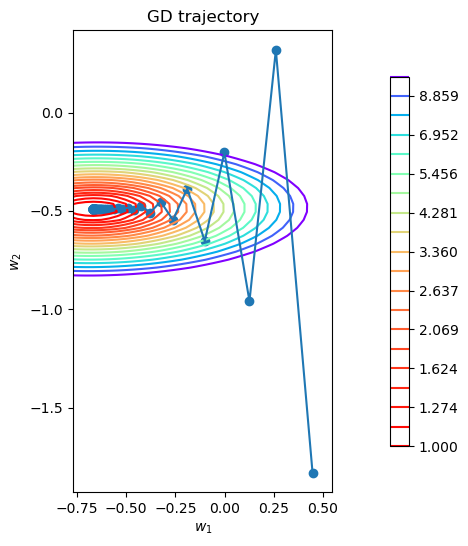

In [17]:
plot_gd(gradient_descent(w_init, X, y, loss, 0.01, 100), X, y, loss)

С шагом 0.01 мы несколько раз прыгаем в разные стороны, так как из-за большого расстояние попадаем в точки, где градиент смотрит в другую сторону, но постепенно сближаемся и доходим до центра, укладываясь в нужное число шагов. Попробуем уменьшить шаг, чтобы траектория была плавной:

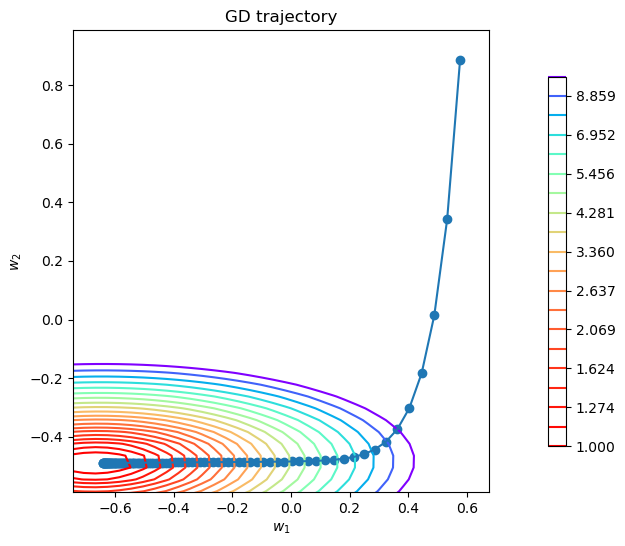

In [250]:
plot_gd(gradient_descent(w_init, X, y, loss, 0.0025, 100), X, y, loss)

Теперь траектория действительно получилась плавной: мы постепенно снижаемся и доходим до центра. Однако тратим на наш путь очень много шагов. Попробуем взять нечто среднее между 1 и 2 вариантами:  

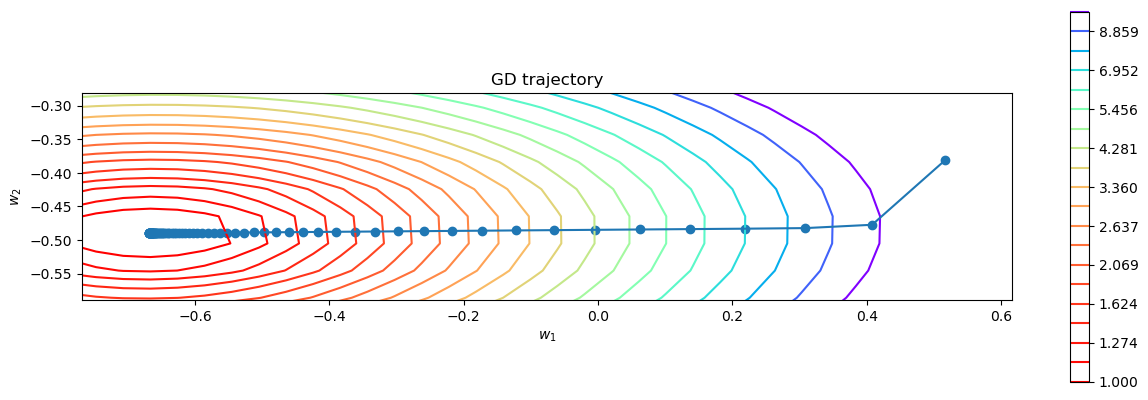

In [252]:
plot_gd(gradient_descent(w_init, X, y, loss, 0.006, 100), X, y, loss)

C lr 0.06 мы за два шага (очень быстро) доходим до прямой траектории, и, судя по всему, тратим на это меньше шагов: даже при 50 шагах мы дойдём до минимума функции потерь, тогда как при шаге 0,0025 мы бы дойти до конечной точки не успели. И этот факт навёл меня на мысль попробовать очень маленький шаг:

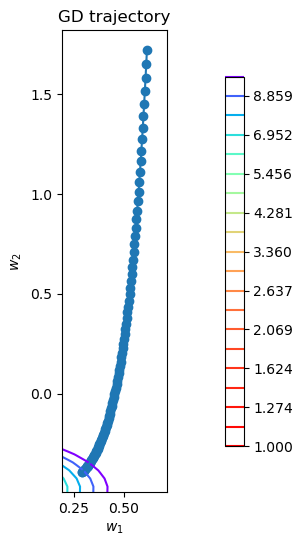

In [254]:
plot_gd(gradient_descent(w_init, X, y, loss, 0.0002, 100), X, y, loss)

С шагом 0.0002 траектория будет плавной, но 100 шагов нам будет катастрофически недостаточно для достижения минимума. Поэтому наилучший из найденных вариантов - это lr=0.006, с ним мы достигаем компромисс между плавностью траектории и скоростью движения

Теперь реализуем стохастический градиентный спуск.

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`.

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча.

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [419]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    final = []
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        w_init = w_init - lr*loss.calc_grad(batch, y[batch_indices], w_init)
        final.append(w_init)
    return final

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`.

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного? Что происходит при малых и больших `batch_size`?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

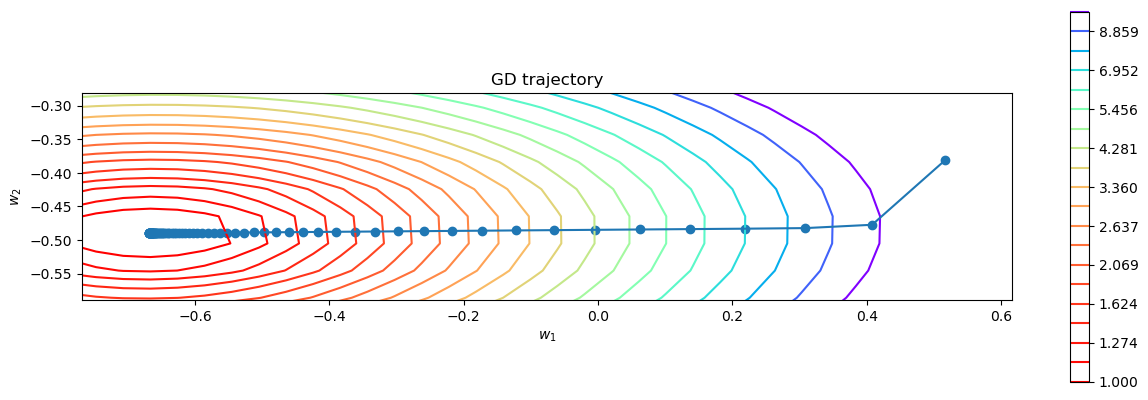

In [258]:
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.006, 300, 100), X, y, loss)

Сначала довольно очевидное наблюдение: если ставим batch_size, равное количеству объектов в датасете, то наша траектория не отличается от обычного градиентного спуска, так как мы движемся согласно истинному градиенту для датасета

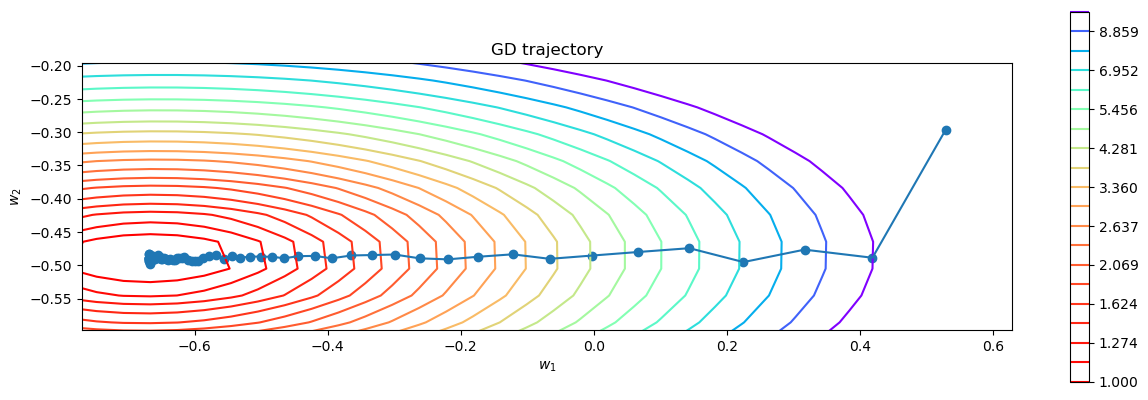

In [260]:
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.006, 250, 100), X, y, loss)

Если сократить batch до 250 объектов, то уже будут заметны неровности в нашей траектории, вызванные ограничением выборки, однако она не будет разительно отличаться от прошлой

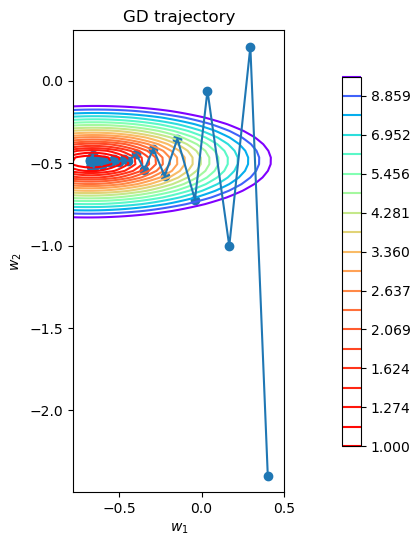

In [262]:
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.01, 100, 100), X, y, loss)

Если поставить длину шага побольше, а выборку сократить до 100 объектов, то будет ситуация, похожая на обычный спуск с параметром lr=0.01, но здесь сближение к ровной траектории будет происходить медленнее из-за ограничения выборки, а градиент первоначально будет сильнее прыгать в разные стороны

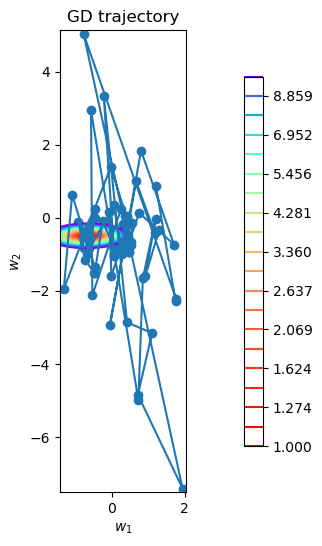

In [264]:
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.0071, 1, 100), X, y, loss)

Если попробуем использовать спуск с 1 объектом и довольно большим шагом, то градиент будет скакать во всевозможные направления и из-за катастрофически маленькой выборки, и из-за большого шага, который не даёт постепенно сойтись к минимуму

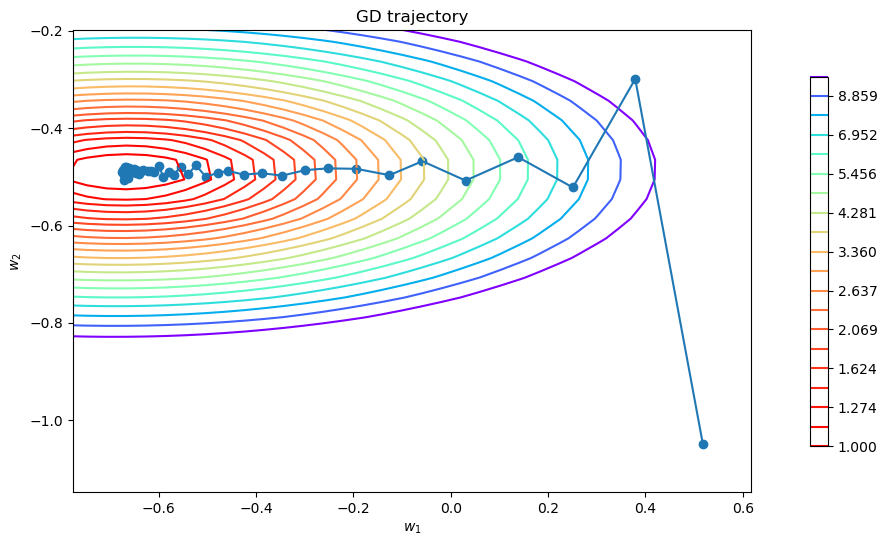

In [266]:
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.0081, 200, 100), X, y, loss)

Теперь я увеличил шаг, но спуск стал лучше, благодаря увеличению в тот же момент выборки до 200 объектов. 

**Таким образом, можно сделать вывод, что рост batch_size приводит к росту точности оценки градиента, а вот рост длины шага выше оптимального может привести к отсутствие сходимости к минимуму. Если же lr будет уменьшаться ниже оптимального значения, то мы может выиграть в точности, но не суметь добраться до минимума за заданное число шагов**

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага.

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы точнее этого минимума достигнуть и не "перепрыгнуть" его.

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [421]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) - начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) - матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) - вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float - параметр величины шага, на который нужно домножать градиент
    :param batch_size: int - размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float - значение степени в формуле затухания длины шага
    :param n_iterations: int - сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) - история весов на каждом шаге
    """
    final = []
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        w_init = w_init - lr*loss.calc_grad(batch, y[batch_indices], w_init)
        final.append(w_init)
        lr = lr*(1/(1+i))**p
    return final

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска. Что происходит при маленьком или большом значении p?

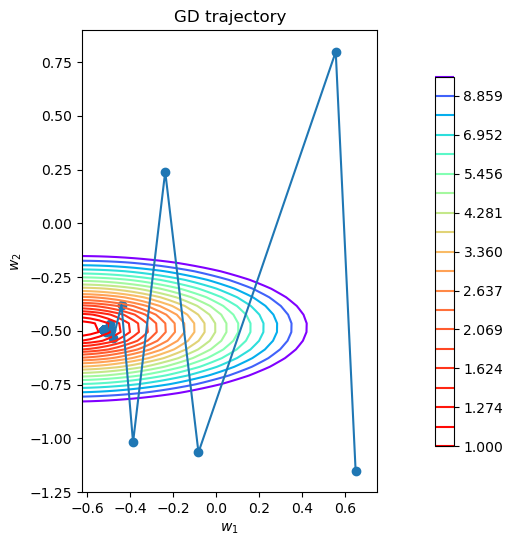

In [270]:
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p=0.10000001), X, y, loss)

Изначально установим p на предельно низком значении. Тогда графически видно, что шаг изначально уменьшается очень медленно, поэтому заметны скачки из стороны в сторону с постепенным сближением к минимуму

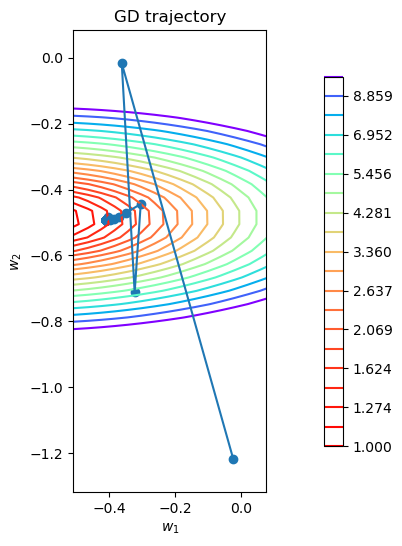

In [272]:
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p=0.2), X, y, loss)

Увеличим p до 0.2 ; теперь заметны 3 больших скачка в разные стороны, а дальше траектория стабилизируется. Можно сделать предположение, что с ростом p затихание становится сильнее

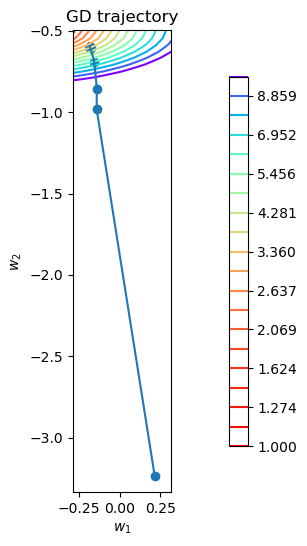

In [274]:
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p=0.6), X, y, loss)

Ещё повысим p, теперь до 0.6. Виден только один большой шаг, дальше затихание приводит к коротким шагам. Но уже заметна проблема: из-за коротких шагов мы не успеваем дойти до минимума при заданном числе итераций.

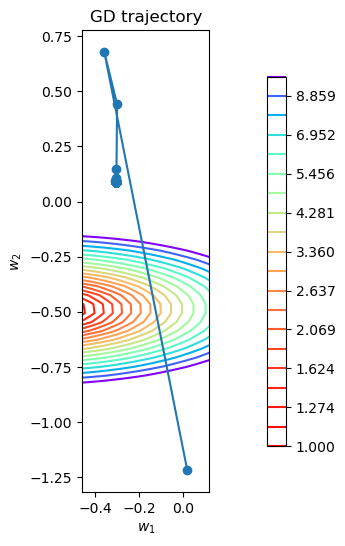

In [276]:
plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p=0.9), X, y, loss)

И последний график, теперь с p=0.9. Здесь первый длинный шаг нас выкидывает очень далеко, но затем происходит сильное сокращение длины шага, и мы останавливаемся далеко от минимума после всех итераций

**Таким образом**, В формуле для затухающего спуска p - это мера его затухания. Так как p находится от 0.1 до 1 (не включительно), то взятие большей степени от снижающегося числа (знаменатель дроби растёт) приведёт к более быстрому затуханию, но мы можем застрять на большом расстоянии от истинного минимума. Если брать p поменьше, то мы, вероятно, подберёмся ближе к минимуму, но около него возникнут колебания, и градиент будет водить нас в разные стороны

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

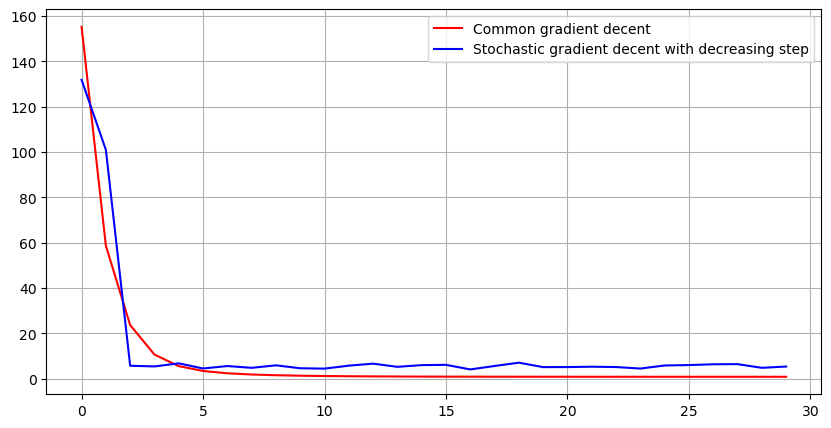

In [466]:
import pandas as pd

sp_basic = []
for i in range(30):
    loss_basic = loss.calc_loss(X, y, gradient_descent(w_init, X, y, loss, 0.01, n_iterations=30)[i])
    sp_basic.append(loss_basic)
#print("Значения для простого спуска", sp_basic)

sp_stoch = []
for i in range(30):
    loss_stoch = loss.calc_loss(X, y, stochastic_gradient_descent(w_init, X, y, loss, 0.01, 100, p=0.6, n_iterations=30)[i])
    sp_stoch.append(loss_stoch)
#print("Значения для стох спуска", sp_stoch)

df = pd.DataFrame({'sp_basic': sp_basic, 'sp_stoch': sp_stoch})

plt.figure(figsize=(10, 5))
plt.plot(df['sp_basic'], label='Common gradient decent', color='red')
plt.plot(df['sp_stoch'], label='Stochastic gradient decent with decreasing step', color='blue')
plt.grid(True)
plt.legend()
plt.show()

По графику видно, что после нулевого шага (все шаги пронумерованы от 0 до 29) обычный спуск намного сильнее снизил ошибку, из-за того, что пользуется полным объёмом выборки. Примерно с 1 по 4 шаг ошибка была ниже на стохастическом спуске, вероятно, из-за уменьшающегося шага (мера затихаемости p = 0.6), который на начальных шаг позволяет точнее найти правильную траекторию. Однако дальше, когда ошибки на обоих спусках становятся более-менее стабильными и сближаются, обычный спуск начинает всегда выдавать меньшую ошибку, ведь, когда мы уже достигли невысокой ошибки, сказывался размер батча, ограниченный 100 объектами и немалое значение p. Векторы антиградиента были разными, мы двигались в разных направлениях, и ошибка колебалась то вверх, то вниз

Преимущество SGD здесь видно лишь на нескольких шагах, далее из-за вышеописанных причин он выдаёт худший результат. Дело ещё и в том, что SGD часто используется для больших датасетов, где обычный спуск очень долго выполняет операции, а для 30 итераций прочувствовать преимущество метода в скорости не получается. Ну и в нашей функции потерь есть только один минимум, и он глобальный, так что использовать SGD для выхода из локальных минимумов совсем необязательно

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`.

В методе `predict` мы будем применять нашу регрессию к датасету.

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`.

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [15]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        self.w = np.random.uniform(-2, 2, (X.shape[1]))
        self.w = gradient_descent(self.w, X, y, self.loss, self.lr)[-1]

    
        return self



    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        return np.dot(X, self.w)

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации.

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [59]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [17]:
import pandas as pd

X_raw = pd.read_csv(
    "cars_data.csv",
    header=None,
    na_values=["?"],
    skiprows=1,
    index_col=0
)
X_raw = X_raw[~X_raw[26].isna()].reset_index(drop=True)
X_raw.head()

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [19]:
y = X_raw[26]
X_raw = X_raw.drop(26, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

Начну я с кодировки категориальных переменных, потому что изначально при работе с 2 разными выборками в каждой получалось разное число колонок из-за того, что в тестовой выборке не было некоторых значений из трейна, и get_dummies под них не создавал колонки, что вызывало разницу в размерностях

In [21]:
X_num = X_raw[[2,10,11,12,13,14,17,19,20,21,22,23,24,25]]
X_cat = X_raw[[1,3,4,5,6,7,8,9,15,16,18]]

X_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       201 non-null    int64 
 1   3       201 non-null    object
 2   4       201 non-null    object
 3   5       201 non-null    object
 4   6       199 non-null    object
 5   7       201 non-null    object
 6   8       201 non-null    object
 7   9       201 non-null    object
 8   15      201 non-null    object
 9   16      201 non-null    object
 10  18      201 non-null    object
dtypes: int64(1), object(10)
memory usage: 17.4+ KB


Видим, что среди всех категориальных признаков пропуски есть только в 6 признаке, значит, нужно будет потом их заполнить

In [23]:
X_cat_coded = pd.get_dummies(X_cat, columns=[1,3,4,5,6,7,8,9,15,16,18]).reset_index(drop=True)
X_cat_coded

,1_-2,1_-1,1_0,1_1,1_2,1_3,3_alfa-romero,3_audi,3_bmw,3_chevrolet,...,16_twelve,16_two,18_1bbl,18_2bbl,18_4bbl,18_idi,18_mfi,18_mpfi,18_spdi,18_spfi
0,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
197,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
198,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
199,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [25]:
X = pd.concat([X_num, X_cat_coded], axis=1)
X

,2,10,11,12,13,14,17,19,20,21,...,16_twelve,16_two,18_1bbl,18_2bbl,18_4bbl,18_idi,18_mfi,18_mpfi,18_spdi,18_spfi
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,False,False,False,False,False,False,False,True,False,False
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,False,False,False,False,False,False,False,True,False,False
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,False,False,False,False,False,False,False,True,False,False
197,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,False,False,False,False,False,False,False,True,False,False
198,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,False,False,False,False,False,False,False,True,False,False
199,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,False,False,False,False,False,True,False,False,False,False


Теперь нужно разделить выборки, потому что нормализовать данные и заполнить пропуски нужно отдельно для трейна и теста во избежание подсмотра данных

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 97 to 102
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   2                114 non-null    float64
 1   10               140 non-null    float64
 2   11               140 non-null    float64
 3   12               140 non-null    float64
 4   13               140 non-null    float64
 5   14               140 non-null    int64  
 6   17               140 non-null    int64  
 7   19               137 non-null    float64
 8   20               137 non-null    float64
 9   21               140 non-null    float64
 10  22               139 non-null    float64
 11  23               139 non-null    float64
 12  24               140 non-null    int64  
 13  25               140 non-null    int64  
 14  1_-2             140 non-null    bool   
 15  1_-1             140 non-null    bool   
 16  1_0              140 non-null    bool   
 17  1_1              140

Пропуски есть:

1) Во 2 колонке (normalized losses) - заменим на среднее
2) В 19 колоке (bore) - заменим на среднее
3) В 20 колонке (stroke) - заменим на среднее
4) В 22 колонке (horsepower) - заменим на среднее
5) В 23 колонке (peakrpm) - заменим на моду, т.к. всего для оборотов в минут есть 20 уникальных значений

In [31]:
X_train[2] = X_train[2].fillna(X_train[2].mean())
X_train[19] = X_train[19].fillna(X_train[19].mean())
X_train[20] = X_train[20].fillna(X_train[20].mean())
X_train[22] = X_train[22].fillna(X_train[22].mean())
X_train[23] = X_train[23].fillna(X_train[23].mode()[0])

Вспоминаем про 2 пропуска в 6 признаке:

In [33]:
X_train[(X_train["6_four"] == False) & (X_train["6_two"] == False)].shape[0]

1

В тренировочной выборке такой элемент 1, посмотрим соотношение 6_four, 6_two:

In [35]:
X_train[(X_train["6_four"] == True)].shape[0],  X_train[(X_train["6_two"] == True)].shape[0]

(82, 57)

Четырёхдверных машин больше, так что заменим значение на four

In [37]:
X_train[(X_train["6_four"] == False) & (X_train["6_two"] == False)]

,2,10,11,12,13,14,17,19,20,21,...,16_twelve,16_two,18_1bbl,18_2bbl,18_4bbl,18_idi,18_mfi,18_mpfi,18_spdi,18_spfi
26,148.0,93.7,157.3,63.8,50.6,2191,98,3.03,3.39,7.6,...,False,False,False,False,False,False,False,True,False,False


In [39]:
X_train['6_four'][26] = True
X_train[(X_train["6_four"] == True)].shape[0],  X_train[(X_train["6_two"] == True)].shape[0]

C:\Users\79199\AppData\Local\Temp\ipykernel_3572\3953958852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['6_four'][26] = True


(83, 57)

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 97 to 102
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   2                140 non-null    float64
 1   10               140 non-null    float64
 2   11               140 non-null    float64
 3   12               140 non-null    float64
 4   13               140 non-null    float64
 5   14               140 non-null    int64  
 6   17               140 non-null    int64  
 7   19               140 non-null    float64
 8   20               140 non-null    float64
 9   21               140 non-null    float64
 10  22               140 non-null    float64
 11  23               140 non-null    float64
 12  24               140 non-null    int64  
 13  25               140 non-null    int64  
 14  1_-2             140 non-null    bool   
 15  1_-1             140 non-null    bool   
 16  1_0              140 non-null    bool   
 17  1_1              140

**Теперь пропусков в трейне нет, перейдем к тесту**

In [501]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 95 to 170
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   2                50 non-null     float64
 1   10               61 non-null     float64
 2   11               61 non-null     float64
 3   12               61 non-null     float64
 4   13               61 non-null     float64
 5   14               61 non-null     int64  
 6   17               61 non-null     int64  
 7   19               60 non-null     float64
 8   20               60 non-null     float64
 9   21               61 non-null     float64
 10  22               60 non-null     float64
 11  23               60 non-null     float64
 12  24               61 non-null     int64  
 13  25               61 non-null     int64  
 14  1_-2             61 non-null     bool   
 15  1_-1             61 non-null     bool   
 16  1_0              61 non-null     bool   
 17  1_1              61 n

Пропуски есть (те же колонки, что и в трейне):

1) Во 2 - среднее
2) В 19 - среднее (как в прошлом пункте)
3) В 20 - среднее
4) В 22 - среднее
5) В 23 - мода

In [43]:
X_test[2] = X_test[2].fillna(X_test[2].mean())
X_test[19] = X_test[19].fillna(X_test[19].mean())
X_test[20] = X_test[20].fillna(X_test[20].mean())
X_test[22] = X_test[22].fillna(X_test[22].mean())
X_test[23] = X_test[23].fillna(X_test[23].mode()[0])

Смотрим на 6 признак

In [45]:
X_test[(X_test["6_four"] == False) & (X_test["6_two"] == False)]

,2,10,11,12,13,14,17,19,20,21,...,16_twelve,16_two,18_1bbl,18_2bbl,18_4bbl,18_idi,18_mfi,18_mpfi,18_spdi,18_spfi
60,123.46,98.8,177.8,66.5,55.5,2443,122,3.39,3.39,22.7,...,False,False,False,False,False,True,False,False,False,False


In [47]:
X_test[(X_test["6_four"] == True)].shape[0],  X_test[(X_test["6_two"] == True)].shape[0]

(31, 29)

four - мода, меняем на неё

In [49]:
X_test['6_four'][60] = True
X_test[(X_test["6_four"] == True)].shape[0],  X_test[(X_test["6_two"] == True)].shape[0]

C:\Users\79199\AppData\Local\Temp\ipykernel_3572\906626387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['6_four'][60] = True


(32, 29)

**Тест тоже избавили от пропусков**

Делим на категориальные и вещественные

In [51]:
X_train_cat = X_train[list(X_cat_coded.columns)].reset_index(drop=True)  
X_test_cat =  X_test[list(X_cat_coded.columns)].reset_index(drop=True)  

X_train_num = X_train[[2,10,11,12,13,14,17,19,20,21,22,23,24,25]].reset_index(drop=True)  
X_test_num =  X_test[[2,10,11,12,13,14,17,19,20,21,22,23,24,25]].reset_index(drop=True)  

X_train_num

,2,10,11,12,13,14,17,19,20,21,22,23,24,25
0,106.000000,97.2,173.4,65.2,54.7,2302,120,3.33,3.47,8.5,97.0,5200.0,27,34
1,101.000000,93.7,150.0,64.0,52.6,1837,79,2.91,3.07,10.1,60.0,5500.0,38,42
2,188.000000,101.2,176.8,64.8,54.3,2765,164,3.31,3.19,9.0,121.0,4250.0,21,28
3,78.000000,96.5,157.1,63.9,58.3,2024,92,2.92,3.41,9.2,76.0,6000.0,30,34
4,154.000000,93.7,167.3,63.8,50.8,2191,98,2.97,3.23,9.4,68.0,5500.0,31,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,121.359649,114.2,198.9,68.4,58.7,3230,120,3.46,3.19,8.4,97.0,5000.0,19,24
136,121.359649,103.5,189.0,66.9,55.7,3230,209,3.62,3.39,8.0,182.0,5400.0,16,22
137,128.000000,94.5,165.6,63.8,53.3,2028,97,3.15,3.29,9.4,69.0,5200.0,31,37
138,122.000000,97.3,171.7,65.5,55.7,2209,109,3.19,3.40,9.0,85.0,5250.0,27,34


In [53]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

normalizer.fit(X_train_num)
X_train_norm = normalizer.transform(X_train_num)
X_test_norm = normalizer.transform(X_test_num)

X_train_norm_df = pd.DataFrame(X_train_norm)
X_train_norm_df.columns = [2,10,11,12,13,14,17,19,20,21,22,23,24,25] #переименовал колонки обратно

X_test_norm_df = pd.DataFrame(X_test_norm)
X_test_norm_df.columns = [2,10,11,12,13,14,17,19,20,21,22,23,24,25] 

X_train_norm_df

,2,10,11,12,13,14,17,19,20,21,22,23,24,25
0,0.018616,0.017070,0.030452,0.011450,0.009606,0.404277,0.021074,0.000585,0.000609,0.001493,0.017035,0.913223,0.004742,0.005971
1,0.017402,0.016144,0.025844,0.011027,0.009063,0.316507,0.013611,0.000501,0.000529,0.001740,0.010338,0.947627,0.006547,0.007236
2,0.036988,0.019910,0.034784,0.012749,0.010683,0.543994,0.032266,0.000651,0.000628,0.001771,0.023806,0.836158,0.004132,0.005509
3,0.012308,0.015227,0.024790,0.010083,0.009200,0.319382,0.014517,0.000461,0.000538,0.001452,0.011993,0.946785,0.004734,0.005365
4,0.025981,0.015808,0.028225,0.010764,0.008570,0.369638,0.016533,0.000501,0.000545,0.001586,0.011472,0.927890,0.005230,0.006411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.020359,0.019158,0.033367,0.011475,0.009847,0.541858,0.020131,0.000580,0.000535,0.001409,0.016273,0.838789,0.003187,0.004026
136,0.019251,0.016418,0.029981,0.010612,0.008836,0.512380,0.033154,0.000574,0.000538,0.001269,0.028871,0.856611,0.002538,0.003490
137,0.022905,0.016910,0.029633,0.011417,0.009538,0.362901,0.017358,0.000564,0.000589,0.001682,0.012347,0.930516,0.005547,0.006621
138,0.021392,0.017061,0.030107,0.011485,0.009767,0.387338,0.019113,0.000559,0.000596,0.001578,0.014904,0.920564,0.004734,0.005962


Объединяем

In [55]:
X_train_final = pd.concat([X_train_norm_df, X_train_cat], axis=1)
X_test_final = pd.concat([X_test_norm_df,X_test_cat], axis=1)
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   2                140 non-null    float64
 1   10               140 non-null    float64
 2   11               140 non-null    float64
 3   12               140 non-null    float64
 4   13               140 non-null    float64
 5   14               140 non-null    float64
 6   17               140 non-null    float64
 7   19               140 non-null    float64
 8   20               140 non-null    float64
 9   21               140 non-null    float64
 10  22               140 non-null    float64
 11  23               140 non-null    float64
 12  24               140 non-null    float64
 13  25               140 non-null    float64
 14  1_-2             140 non-null    bool   
 15  1_-1             140 non-null    bool   
 16  1_0              140 non-null    bool   
 17  1_1             

In [67]:
X_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 70 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   2                61 non-null     float64
 1   10               61 non-null     float64
 2   11               61 non-null     float64
 3   12               61 non-null     float64
 4   13               61 non-null     float64
 5   14               61 non-null     float64
 6   17               61 non-null     float64
 7   19               61 non-null     float64
 8   20               61 non-null     float64
 9   21               61 non-null     float64
 10  22               61 non-null     float64
 11  23               61 non-null     float64
 12  24               61 non-null     float64
 13  25               61 non-null     float64
 14  1_-1             61 non-null     bool   
 15  1_0              61 non-null     bool   
 16  1_1              61 non-null     bool   
 17  1_2              6

Теперь наши тренировочные выборки лежат в X_train_final и X_test_final

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [61]:
linreg = linear_regression.fit(X_train_final, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [63]:
from sklearn.metrics import mean_squared_error

y_train_pred = linreg.predict(X_train_final)
mean_squared_error(y_train_pred, y_train)

1798793.5835490457

In [65]:
y_test_pred = linreg.predict(X_test_final)
mean_squared_error(y_test_pred, y_test)

12886321.992145328

Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации.

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`.

Он должен вычислять лосс и градиент по формулам выше.

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`.

In [67]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        
        return np.sum((np.dot(X,w) - y)**2)/len(y) + self.coef * np.sum(w[:-1] ** 2)
            

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        
        """
        bias = 2 * self.coef * w
        bias[-1] = 0
        return (2/len(y)) * np.dot(X.T, (np.dot(X, w) - y)) + bias

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [86]:
linear_regression = LinearRegression(MSEL2Loss(0.001))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации.

In [88]:
linreg_2 = linear_regression.fit(X_train_final, y_train)

In [89]:
y_test_pred2 = linreg_2.predict(X_test_final)
print("На тестовой выборке ошибка уменьшилась с 12886430.12595382 до", mean_squared_error(y_test_pred2, y_test))

На тестовой выборке ошибка уменьшилась с 12886430.12595382 до 12560589.088389805


In [90]:
y_train_pred2 = linreg_2.predict(X_train_final)
print("На тренировочной выборке ошибка выросла с 1798794.9257093838 до", mean_squared_error(y_train_pred2, y_train))

На тренировочной выборке ошибка выросла с 1798794.9257093838 до 2009848.67404999


**Таким образом, мы в некоторой степени предотвратили переобучение, так как, ошибка на известных тренировочных данных выросла,а ошибка на тестовых данных снизилась примерно на 340841 при коэффициенте lambda 0.001 (т.е модель стала лучше обобщать входные данные). Однако при этом соотношение между ошибкой теста и трейна очень велико, и, раз регуляризация не помогла, проблема может быть в большом различии данных на тесте и трейне: как я уже писал, при первой моей попытке обработать датасет в тестовой выборке встречались значения категориальных переменных, которых не было в трейне, следовательно, модель может не знать как себя с такими значениями вести и из-за этого очень сильно ошибаться**

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`.

Он должен вычислять лосс и градиент по формулам выше.

In [793]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        z = np.dot(X,w) - y
        
        sit1 = 0.5 * (z**2)
        sit2 = self.eps * (np.abs(z) - 0.5 * self.eps)
    
        loss_hl = np.where(np.abs(z) < self.eps, sit1, sit2) #вместо того, чтобы пробегаться циклом, с помощью numpy выводим один из 2 результатов
        return loss_hl/len(y)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        z = np.dot(X,w) - y
        grad_hl = np.where(np.abs(z) < self.eps, z, self.eps * np.sign(z))
        return np.dot(X.T, grad_hl)/len(y) #икс транспонируем по аналогии с матричным видом градиента для MSE, чтобы размерности соблюдались
        

    
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

Эпсилон выбирается в зависимости от наших предпочтений по допустимому отклонению предиктов от фактических значений y. Посмотрим на диапазон значений тренировочных y:

In [795]:
min(y_train), max(y_train)

(5118.0, 45400.0)

Эпсилон будем брать в тысячах, не забывая, что корень из MSE ранее был где-то между 3000 и 4000, поэтому эпсилон логично взять побольше. Возьмём, к примеру, eps = 6750:

In [887]:
linear_regression = LinearRegression(HuberLoss(6750))

In [889]:
linreg_3 = linear_regression.fit(X_train_final, y_train)

In [890]:
y_train_pred3 = linreg_3.predict(X_train_final)
print("На тренировочной выборке", mean_squared_error(y_train_pred3, y_train))

На тренировочной выборке 1820217.2036558015


In [891]:
y_test_pred3 = linreg_3.predict(X_test_final)
print("На тестовой выборке", mean_squared_error(y_test_pred3, y_test))

На тестовой выборке 12991028.191940077


Это лучший результат для тестовой выборки при использовании ХБ, что всё ещё превышает значение при использовании обычной MSE. Скорее всего, Хубер-Лосс просто не подходит под наш датасет. При добавлении же ХБ, мы начинаем снижать ошибки модели при большом отклонении предсказанного и фактического Y, ссылаясь на выбросы, но, видимо, выбросов в нашем датасете мало или вовсе нет, из-за чего мы делаем неверные предположения при обучении модели.

Применяя ХБ мы прощаем большие отклонения, которые, однако, могут быть обоснованы неподготовленностью модели к тестовым данным: ошибка на тесте всё ещё гораздо выше, чем на трейне, то есть переобучение, вызванное очень невыгодным разбиением, которое я упоминал в разговоре о регуляризации, может быть реальной причиной больших отклонений от верного ответа

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2025 в ячейку ниже:

<a href="https://ibb.co/JWSHvTMq"><img src="https://i.ibb.co/kVPX4TWJ/photo-2025-03-29-23-07-44.jpg" alt="photo-2025-03-29-23-07-44" border="0"></a>

### БОНУС (2 балла)

Градиентный спуск — далеко не единственный метод оптимизации.
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2 балла)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии.

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределения с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.